In [156]:
import pandas as pd
import numpy as np

import random

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
import seaborn as sns
import gc
import utils 

plt.style.use('ggplot')
%matplotlib inline

In [157]:
sorted([(0.538567255572, 'ap_hi'),
(0.538588478581, 'gluc'),
(0.538546917349, 'age_group_gender'),
(0.538538052046, 'age_group_gluc'),
(0.538446699606, 'gender_MAP'),
(0.538589229798, 'gender_smoke'),
(0.53859757607, 'gender_active'),
(0.538577368412, 'MAP_error_group'),
(0.538605556333, 'MAP_smoke'),
(0.538595737992, 'MAP_active'),
(0.538590281731, 'error_group_gluc'),
(0.538613057047, 'error_group_active'),
(0.538403616287, 'cholesterol_gluc'),
(0.538513905577, 'gluc_smoke'),
(0.538592834598, 'gluc_alco'),
(0.538459912893, 'gluc_active'),
(0.538497101023, 'smoke_active'),
(0.538503250338, 'age_group_gender_error_group'),
(0.538511181624, 'age_group_gender_gluc'),
(0.538542876918, 'age_group_gender_smoke'),
(0.538502938446, 'age_group_gender_alco'),
(0.538421388154, 'age_group_error_group_gluc'),
(0.538585787788, 'age_group_error_group_alco'),
(0.538515840047, 'age_group_gluc_smoke'),
(0.538604509019, 'age_group_gluc_alco'),
(0.538473146062, 'age_group_gluc_active'),
(0.538549234756, 'gender_MAP_error_group'),
(0.538538765546, 'gender_MAP_smoke'),
(0.538621130436, 'gender_MAP_alco'),
(0.538224666658, 'gender_cholesterol_gluc'),
(0.53854568799, 'gender_cholesterol_smoke'),
(0.538519596999, 'gender_cholesterol_active'),
(0.538583122431, 'gender_gluc_smoke'),
(0.538546386493, 'gender_gluc_active'),
(0.538433428412, 'gender_smoke_active'),
(0.538530472903, 'gender_alco_active'),
(0.538607528017, 'MAP_error_group_smoke'),
(0.538608970885, 'MAP_error_group_alco'),
(0.538496750986, 'MAP_gluc_active'),
(0.538554965298, 'MAP_BMI_group_alco'),
(0.538540542747, 'MAP_smoke_alco'),
(0.538554965298, 'MAP_alco_height_group'),
(0.538390958086, 'error_group_cholesterol_gluc'),
(0.538458153646, 'error_group_smoke_active'),
(0.538598031272, 'error_group_smoke_weight_group'),
(0.538462902667, 'error_group_alco_active'),
(0.538545756092, 'cholesterol_gluc_BMI_group'),
(0.538458056167, 'cholesterol_gluc_smoke'),
(0.538347090052, 'cholesterol_gluc_alco'),
(0.538264506609, 'cholesterol_gluc_active'),
(0.538545756092, 'cholesterol_gluc_height_group'),
(0.538492455954, 'gluc_BMI_group_smoke'),
(0.538578197781, 'gluc_smoke_alco'),
(0.538438930193, 'gluc_smoke_active'),
(0.538492455954, 'gluc_smoke_height_group'),
(0.538537529542, 'gluc_alco_active'),
(0.538537556667, 'smoke_alco_active'),
       
(0.538721429916, 'age_group_gender_gluc_smoke'),
(0.538699428457, 'age_group_gender_gluc_alco'),
(0.538704888347, 'age_group_gender_gluc_active'),
(0.538704316355, 'age_group_gender_smoke_active'),
(0.538725712345, 'age_group_gluc_alco_active'),
(0.538662681371, 'gender_cholesterol_gluc_smoke'),
(0.538632765675, 'gender_cholesterol_gluc_alco'),
(0.538485049101, 'gender_cholesterol_gluc_active'),
(0.538616169696, 'gender_gluc_smoke_active'),
(0.538698437031, 'cholesterol_gluc_smoke_alco'),
(0.538423057656, 'cholesterol_gluc_smoke_active'),
(0.538579099797, 'cholesterol_gluc_alco_active'),
(0.538602256739, 'age_group_gender_gluc_smoke_active'),
(0.538625676171, 'gender_cholesterol_gluc_smoke_active'),
(0.538726602437, 'gender_cholesterol_gluc_alco_active'),
(0.538485357473, 'cholesterol_gluc_smoke_alco_active'),
       ])



[(0.538224666658, 'gender_cholesterol_gluc'),
 (0.538264506609, 'cholesterol_gluc_active'),
 (0.538347090052, 'cholesterol_gluc_alco'),
 (0.538390958086, 'error_group_cholesterol_gluc'),
 (0.538403616287, 'cholesterol_gluc'),
 (0.538421388154, 'age_group_error_group_gluc'),
 (0.538423057656, 'cholesterol_gluc_smoke_active'),
 (0.538433428412, 'gender_smoke_active'),
 (0.538438930193, 'gluc_smoke_active'),
 (0.538446699606, 'gender_MAP'),
 (0.538458056167, 'cholesterol_gluc_smoke'),
 (0.538458153646, 'error_group_smoke_active'),
 (0.538459912893, 'gluc_active'),
 (0.538462902667, 'error_group_alco_active'),
 (0.538473146062, 'age_group_gluc_active'),
 (0.538485049101, 'gender_cholesterol_gluc_active'),
 (0.538485357473, 'cholesterol_gluc_smoke_alco_active'),
 (0.538492455954, 'gluc_BMI_group_smoke'),
 (0.538492455954, 'gluc_smoke_height_group'),
 (0.538496750986, 'MAP_gluc_active'),
 (0.538497101023, 'smoke_active'),
 (0.538502938446, 'age_group_gender_alco'),
 (0.538503250338, 'age_gro

In [158]:
best_interactions = [
"ap_hi",
"gluc",
"age_group_gender",
"age_group_gluc",
"gender_MAP",
"gender_smoke",
"gender_active",
"MAP_error_group",
"MAP_smoke",
"MAP_active",
"error_group_gluc",
"error_group_active",
"cholesterol_gluc",
"gluc_smoke",
"gluc_alco",
"gluc_active",
"smoke_active",
"age_group_gender_error_group",
"age_group_gender_gluc",
"age_group_gender_smoke",
"age_group_gender_alco",
"age_group_error_group_gluc",
"age_group_error_group_alco",
"age_group_gluc_smoke",
"age_group_gluc_alco",
"age_group_gluc_active",
"gender_MAP_error_group",
"gender_MAP_smoke",
"gender_MAP_alco",
"gender_cholesterol_gluc",
"gender_cholesterol_smoke",
"gender_cholesterol_active",
"gender_gluc_smoke",
"gender_gluc_active",
"gender_smoke_active",
"gender_alco_active",
"MAP_error_group_smoke",
"MAP_error_group_alco",
"MAP_gluc_active",
"MAP_BMI_group_alco",
"MAP_smoke_alco",
"MAP_alco_height_group",
"error_group_cholesterol_gluc",
"error_group_smoke_active",
"error_group_smoke_weight_group",
"error_group_alco_active",
"cholesterol_gluc_BMI_group",
"cholesterol_gluc_smoke",
"cholesterol_gluc_alco",
"cholesterol_gluc_active",
"cholesterol_gluc_height_group",
"gluc_BMI_group_smoke",
"gluc_smoke_alco",
"gluc_smoke_active",
"gluc_smoke_height_group",
"gluc_alco_active",
"smoke_alco_active",

"age_group_gender_gluc_smoke",
"age_group_gender_gluc_alco",
"age_group_gender_gluc_active",
"age_group_gender_smoke_active",
"age_group_gluc_alco_active",
"gender_cholesterol_gluc_smoke",
"gender_cholesterol_gluc_alco",
"gender_cholesterol_gluc_active",
"gender_gluc_smoke_active",
"cholesterol_gluc_smoke_alco",
"cholesterol_gluc_smoke_active",
"cholesterol_gluc_alco_active",
"age_group_gender_gluc_smoke_active",
"gender_cholesterol_gluc_smoke_active",
"gender_cholesterol_gluc_alco_active",
"cholesterol_gluc_smoke_alco_active",
]

In [159]:
def clean_data(data):
    data['error_group'] = 0

    # weight/height correction
    idx = (data['height']<130) & (data['weight']>150)
    data.loc[idx, ["height", "weight"]] = data.loc[idx, ["weight", "height"]].values
#     data.loc[idx, 'error_group'] = 100-1
#     data.loc[data['weight']<20, "weight"] *= 10
#     data.loc[data['weight']<20, "weight"] *= 10
#     data.loc[data['weight']<25, "weight"] += 100

    # preasure correction

    data.loc[data["ap_hi"] < 0, "ap_hi"] *= -1
    data.loc[data["ap_lo"] < 0, "ap_lo"] *= -1
    
    for i in range(10):
        str_i = str(i)
        data['hi_' + str_i + 's'] = data['ap_hi'].apply(lambda x: str(x).count(str_i))
#         data[str(i)+'lo'] = data['ap_lo'].apply(lambda x: str(x).count(str(i)))
#         data[str(i)+'hilo'] = data[str(i)+'hi']+data[str(i)+'lo']
#         data=data.drop(str(i)+'lo', axis=1)
        for j in range(10):
            str_j = str_i + str(j)
            data['hi_' + str_j + 's'] = data['ap_hi'].apply(lambda x: str(x).count(str_j))
        

    data.loc[(data['ap_lo'] < 20), 'error_group'] = 5
    data.loc[(data['ap_hi'] < 50), 'error_group'] = 6
    data.loc[(data['ap_lo'] > 250), 'error_group'] = 1
    data.loc[(data['ap_lo'] > 4000), 'error_group'] = 2
    data.loc[(data['ap_hi'] > 250), 'error_group'] = 3
    data.loc[(data['ap_hi'] > 10000), 'error_group'] = 4

    data.loc[(data["ap_hi"] < 20) & (data["ap_hi"] > 10), "ap_hi"] *= 10
    data.loc[(data["ap_lo"] < 15) & (data["ap_lo"] > 2), "ap_lo"] *= 10

    idx = data['ap_hi'] > 10000
    data.loc[idx, 'ap_hi'] = 10 * (data.loc[idx, 'ap_hi'] // 1000)
    data.loc[data['ap_lo'] >= 10000, 'ap_lo'] //= 100

#     data.loc[data['ap_lo'].isin([1100])&(data['ap_hi']>160), 'ap_lo'] = 110
#     data.loc[data['ap_lo'].isin([1100]), 'ap_lo'] = 100
#     data.loc[(data['ap_lo']>250)&(data['ap_lo']<4000)&(data['ap_lo']%100==0), 'ap_lo'] /= 10
    
    manual_update = [
        
# id	age	gender	height	weight	ap_hi	ap_lo	cholesterol	gluc	smoke	alco	active	cardio	BMI
# 12494	16905	2	163	63.0	1	2088	1	1	1.0	0.0	1.0	0	23.711845
# 42591	18191	2	162	63.0	140	1900	1	1	1.0	0.0	1.0	1	24.005487
# 78873	20323	1	168	68.0	130	1900	1	1	0.0	0.0	1.0	0	24.092971
# 51749	18419	1	169	62.0	1	2088	1	1	0.0	0.0	1.0	-5	21.707923
        (12494, ['ap_hi', 'ap_lo'], [120, 80]),
        (42591, ['ap_hi', 'ap_lo'], [140, 90]), # ?
        (78873, ['ap_hi', 'ap_lo'], [130, 100]), # ?
        (51749, ['ap_hi', 'ap_lo'], [120, 80]),
        
# 57807	20496	1	164	62.0	70	1100	1	1	0.0	0.0	0.0	0	23.051755
# 60477	18716	1	171	80.0	1	1088	1	1	0.0	0.0	1.0	1	27.358845
# 91198	18182	2	186	95.0	100	901	2	2	0.0	0.0	1.0	0	27.459822
# 6580	19079	1	176	92.0	1	1099	1	1	0.0	NaN	1.0	-5	29.700413
        (57807, ['ap_hi', 'ap_lo'], [170, 100]),
        (60477, ['ap_hi', 'ap_lo'], [110, 80]),
        (91198, ['ap_hi', 'ap_lo'], [100, 90]),
        (6580,  ['ap_hi', 'ap_lo'], [110, 90]),
        
# 44701	22801	1	163	115.0	20	170	1	1	0.0	0.0	1.0	1	43.283526
# 94673	22551	1	169	88.0	10	160	3	3	0.0	0.0	0.0	1	30.811246
        (44701, ['ap_hi', 'ap_lo'], [120, 70]),
        (94673,  ['ap_hi', 'ap_lo'], [110, 60]),
        
    ]
    for idx, cols, update in manual_update:
        data.loc[data['id']==idx, cols] = update
        

    return data

In [160]:
train = pd.read_csv('train.csv', sep=';')
test = pd.read_csv('test.csv', sep=';', na_values='None')

train = clean_data(train)
test = clean_data(test)

train = utils.new_features(train)
test = utils.new_features(test)

X_train = train.drop([ 'cardio'], axis=1)
y_train = train['cardio'].values.ravel()
X_test = test.drop([], axis=1)

# columns_to_interact = ['age_group', 'gender', 'MAP', 'error_group', 'cholesterol', 'gluc', 
#                        'BMI_group', 'smoke', 'alco', 'active', "ap_hi_group", "ap_lo_group",
#                       "weight_group", "height_group"]
# temp = utils.generate_interactions(X_train, columns_to_interact, degree=5, white_list=best_interactions)
# X_train = pd.concat((X_train, temp), axis=1)
# X_test = pd.concat((X_test, utils.generate_interactions(X_test, columns_to_interact, degree=5, white_list=best_interactions)), axis=1)
# print(temp.columns)

# X = pd.concat((X_train, X_test), axis=0)

# from sklearn.preprocessing import LabelEncoder
# from collections import defaultdict
# label_encoder_dict = defaultdict(LabelEncoder)
# columns_to_encode = ['age_group'] + list(temp.columns)


# X[columns_to_encode].apply(lambda x: label_encoder_dict[x.name].fit(x))
# X_train[columns_to_encode] = X_train[columns_to_encode].apply(lambda x: label_encoder_dict[x.name].transform(x))
# X_test[columns_to_encode] = X_test[columns_to_encode].apply(lambda x: label_encoder_dict[x.name].transform(x))

In [161]:
from sklearn.model_selection import train_test_split
__, idx = train_test_split(list(range(X_train.shape[0])), test_size=0.101, random_state=42)
X_train.loc[idx, 'alco'] = np.nan
__, idx = train_test_split(list(range(X_train.shape[0])), test_size=0.101, random_state=43)
X_train.loc[idx, 'smoke'] = np.nan
__, idx = train_test_split(list(range(X_train.shape[0])), test_size=0.096, random_state=44)
X_train.loc[idx, 'active'] = np.nan

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.base import clone

def impute_nans(model, X_train, X_test, columns, target, perform_cv = False, scoring='accuracy'):
    X = pd.concat((X_train, X_test), axis=0)
    train_idx = ~X[target].isnull()
    model = clone(model)
    model.fit(X.loc[train_idx, columns], X.loc[train_idx, target])
    X_train.loc[X_train[target].isnull(), target] = model.predict(X_train.loc[X_train[target].isnull(), columns])
    X_test.loc[X_test[target].isnull(), target] = model.predict(X_test.loc[X_test[target].isnull(), columns])
    
    if perform_cv:
        n_folds = 7
        kf = StratifiedKFold(random_state=111, n_splits=n_folds, shuffle=True)
        scores = cross_val_score(model, X.loc[train_idx, columns], X.loc[train_idx, target], cv=kf, scoring=scoring)
        print(target, np.mean(scores), 'on', n_folds, 'folds', 'with mean on train', X.loc[train_idx, target].mean())
    
params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'n_estimators': 200,
    'subsample': 0.8,
    'n_jobs': 4,
    'random_state': 2707,
    'silent': True,
}
clf = xgb.XGBClassifier(**params)

columns = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc','BMI', 'ap_dif', 'MAP']
impute_nans(clf, X_train, X_test, columns, 'smoke')#, perform_cv = True)

columns = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc','BMI', 'ap_dif', 'MAP', ]
impute_nans(clf, X_train, X_test, columns, 'alco')#, perform_cv = True)

columns = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc','BMI', 'ap_dif', 'MAP', ]
impute_nans(clf, X_train, X_test, columns, 'active')#, perform_cv = True)

In [162]:
columns_to_interact = ['age_group', 'gender', 'MAP', 'error_group', 'cholesterol', 'gluc', 
                       'BMI_group', 'smoke', 'alco', 'active', "ap_hi_group", "ap_lo_group",
                      "weight_group", "height_group"]
temp = utils.generate_interactions(X_train, columns_to_interact, degree=5, white_list=best_interactions)
X_train = pd.concat((X_train, temp), axis=1)
X_test = pd.concat((X_test, utils.generate_interactions(X_test, columns_to_interact, degree=5, white_list=best_interactions)), axis=1)
print(temp.columns)

X = pd.concat((X_train, X_test), axis=0)

Index(['age_group_gender', 'age_group_gluc', 'gender_MAP', 'gender_smoke',
       'gender_active', 'MAP_error_group', 'MAP_smoke', 'MAP_active',
       'error_group_gluc', 'error_group_active', 'cholesterol_gluc',
       'gluc_smoke', 'gluc_alco', 'gluc_active', 'smoke_active',
       'age_group_gender_error_group', 'age_group_gender_gluc',
       'age_group_gender_smoke', 'age_group_gender_alco',
       'age_group_error_group_gluc', 'age_group_error_group_alco',
       'age_group_gluc_smoke', 'age_group_gluc_alco', 'age_group_gluc_active',
       'gender_MAP_error_group', 'gender_MAP_smoke', 'gender_MAP_alco',
       'gender_cholesterol_gluc', 'gender_cholesterol_smoke',
       'gender_cholesterol_active', 'gender_gluc_smoke', 'gender_gluc_active',
       'gender_smoke_active', 'gender_alco_active', 'MAP_error_group_smoke',
       'MAP_error_group_alco', 'MAP_gluc_active', 'MAP_BMI_group_alco',
       'MAP_smoke_alco', 'MAP_alco_height_group',
       'error_group_cholesterol_gluc', 'e

In [213]:
use_columns = [
    'age_group', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active',
'BMI',
 'MAP',
    'ap_dif',
]
mean_columns = [
    'cholesterol_gluc_smoke_active',
#     'ap_hi', 
    'gluc', 
#     'MAP_active',
#     'gender_MAP', 
    'cholesterol_gluc',
    'gluc_smoke',
                'gluc_active', 'gluc_alco', 'smoke_active', 'cholesterol_gluc_active', 'gender_cholesterol_gluc'
] #, 'age_group_MAP', 'gender_MAP'

# for i in range(10):
#         str_i = str(i)
#         use_columns.append(str_i)
#         for j in range(10):
#             str_j = str_i + str(j)
#             use_columns.append(str_j)

In [214]:
import gc
gc.collect()

197

In [215]:
# X_train['cholesterol_gluc_smoke_active'].value_counts()

In [216]:
# X_test['cholesterol_gluc_smoke_active'].value_counts()

In [217]:
#  5	(0.5387210612358031, 0.53908495582477467)
#  6	(0.53875910103167679, 0.53914751218811652)
#  7	(0.53880255564816204, 0.53916006288317908)
#  8	(0.53885523453108464, 0.53925112418043775)
#  9	(0.53883513664677474, 0.53926419236173784)
# 10	(0.53859977707105033, 0.53901168020149492)
# 11	(0.53885940801773513, 0.5392083353358218)
# 12	(0.5387449524031015, 0.53910693602820126)
# 13	(0.53860169446196149, 0.53894647849839095)
# 14	(0.53868075060547327, 0.53902469873650505)
# 15	(0.53862027392521605, 0.53901222140087546)
# 16	(0.53888470508839914, 0.53924245981066532)
# 17	(0.53871842606094211, 0.53910013326813211)
# 18	(0.53875072382243228, 0.53913302528622098)
# 19	(0.53871978044672797, 0.53907222634869367)
# 20	(0.53873956020603608, 0.5391327381456501)
# 21	(0.53867673120877213, 0.53906722821160313)
# 22	(0.53872675503165057, 0.53909177387999974)
# 23	(0.5387593012507248, 0.53915932529166388)
# 24	(0.53871720156688541, 0.53901944164662974)
# 25	(0.53871319790519423, 0.53907590822454066)
# 26	(0.5387557838828374, 0.53917015878887609)
# 27	(0.53871462107471579, 0.5390504570167638)

In [218]:
import utils
params = {
    'colsample_bytree': 0.8,
    #'gamma': 0.125,
    'learning_rate': 0.1,
#     'max_depth': 4,
    # 'min_child_weight': 1,
    'n_estimators': 224,
    'subsample': 0.8,
    # 'reg_alpha': 0.0,
    # 'reg_lambda': 2.0,
    
    'n_jobs': 4,
    'random_state': 2707,
    'silent': True,
}

utils.execute_model(xgb.XGBClassifier(**params),
              X_train,
              y_train,
              X_test,
              model_name="model1",
               mean_columns = mean_columns,
              use_columns = use_columns,
              n_splits=15,
              n_folds=10,
#               stratification_groups=rew,
              alpha=13,
#               seed=150
             )
gc.collect()
# 10 folds logloss:
# [0.53879171211127175, 0.54238427117159227, 0.53835795056164537, 0.53590450923434263, 0.53965623001675889, 0.53466719153279707, 0.53797157618311608, 0.54158551989326476, 0.53629106584952935, 0.541785575506043]
# mean: 0.538739560206
# std: 0.00250712719565
# 15 Splits logloss:
# [0.53990746477150675, 0.54170948794032159, 0.53577194222410518, 0.54126022680376951, 0.53938495633157968, 0.53626944090268058, 0.54246021538176914, 0.53646336087510926, 0.54158070565743344, 0.53745181211087723, 0.53646428880860408, 0.53886036689953631, 0.54046600754234764, 0.53630953872061249, 0.54263125721449978]
# mean: 0.539132738146
# std: 0.00241552376841
# model1+ results saved!


10 folds logloss:
[0.53928745629288988, 0.54277215248097899, 0.53834511305938926, 0.53440835757053118, 0.53945656874781822, 0.53449594949298695, 0.53734680388782807, 0.5414401316130012, 0.53692052582224148, 0.5417170125405999]
mean: 0.538619007151
std: 0.00274337133325
15 Splits logloss:
[0.54004644182001293, 0.54178885719047687, 0.53535484040676906, 0.54099029131504406, 0.5387000149104525, 0.53647923618432469, 0.54226642887722465, 0.53616233684343195, 0.54120734427171335, 0.53759663902386745, 0.53631786326211828, 0.53872557429037715, 0.54024509482209626, 0.5363619505606616, 0.54238962051855766]
mean: 0.538975502286
std: 0.00238590853169
model1 results saved!


1363

In [219]:
params = {
    'colsample_bytree': 0.8,
    #'gamma': 0.125,
    'learning_rate': 0.1,
    # 'max_depth': 9,
    # 'min_child_weight': 1,
    'n_estimators': 200,
    'subsample': 0.8,
    # 'reg_alpha': 0.0,
    # 'reg_lambda': 2.0,
    'tree_method': 'hist',
    'grow_policy': 'lossguide',
    
    'n_jobs': 1,
    'random_state': 2707,
    'silent': True,
}

utils.execute_model(xgb.XGBClassifier(**params),
              X_train,
              y_train,
              X_test,
              model_name="model2",
              mean_columns = mean_columns,
              use_columns = use_columns,
              n_splits=15,
              n_folds=10,
#               stratification_groups=rew,
              alpha=13,
             )
gc.collect()
# ds logloss:
# [0.53838775050345211, 0.54261874382933317, 0.53928867846307305, 0.53517951068627134, 0.53954022503431909, 0.53495162372994898, 0.53832780278071102, 0.54151861980412785, 0.53622335988762093, 0.54144787624529611]
# mean: 0.538748419096
# std: 0.00254352152431
# 15 Splits logloss:
# [0.53975054028836633, 0.54185785865419411, 0.53596000542052324, 0.541394881952169, 0.53921806647281545, 0.53599988924526454, 0.54255523619557255, 0.53663155144904706, 0.54115136838759059, 0.53740464346588646, 0.5365239498279466, 0.53874940825129614, 0.54019631961036263, 0.53671776224865975, 0.54252445237787772]
# mean: 0.539109062257
# std: 0.002355921174
# model2+ results saved!


10 folds logloss:
[0.53848955881817651, 0.54267378851507853, 0.53886163199033843, 0.53534187586836635, 0.53918021388236059, 0.53473690841162158, 0.53772559302383616, 0.54143139833961573, 0.53682671670471371, 0.54088424780190325]
mean: 0.538615193336
std: 0.00244322157108
15 Splits logloss:
[0.53973473496266633, 0.54176800918785162, 0.53541428222293408, 0.54081457096350172, 0.5388531436294689, 0.53611729665046459, 0.54252583492525008, 0.53639977635909553, 0.54113346747531565, 0.53734065262251673, 0.53630955615927089, 0.5387077049572746, 0.54036063971328507, 0.53639432174024848, 0.54230001859220767]
mean: 0.538944934011
std: 0.00239430644668
model2 results saved!


1363

In [220]:
import lightgbm as lgb
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import KFold

params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
#     'num_leaves': 2**3,
#     'min_child_weight': 1,
    'n_estimators': 44,
    'subsample': 0.8,
#     'reg_alpha': 1.2,
#     'reg_lambda': 0.0,
       
    'nthread': 1,
    'seed': 2707,
    'silent': True,
}

#kf = KFold(n_splits=7, random_state=12345)
utils.execute_model(lgb.LGBMClassifier(**params), #CalibratedClassifierCV(lgb.LGBMClassifier(**params), cv=kf),
              X_train,
              y_train,
              X_test,
              model_name="model3",
              mean_columns = mean_columns,
              use_columns = use_columns,
              n_splits=15,
              n_folds=10,
#               stratification_groups=rew,
              alpha=13
             )
gc.collect()
# 10 folds logloss:
# [0.53878261099232327, 0.54210784783582577, 0.53809482292303445, 0.53609552244928205, 0.54026202753931118, 0.53530128563380508, 0.53786962161525931, 0.54130416790795344, 0.53657631979284648, 0.54054578419130106]
# mean: 0.538694001088
# std: 0.00219428300863
# 15 Splits logloss:
# [0.53948937210350822, 0.54161359215348182, 0.53507513769243864, 0.54104127811197134, 0.53934383317359258, 0.53645848684775677, 0.54283650309623088, 0.53660968529008857, 0.54159792050850664, 0.53694623232395022, 0.53561972528550217, 0.5387600102110226, 0.53955752137824287, 0.53634922619574232, 0.54234585724637496]
# mean: 0.538909625441
# std: 0.00251014294768
# model3+ results saved!


10 folds logloss:
[0.53855160904318711, 0.54207289881400822, 0.53879550487779837, 0.535735774644167, 0.54033862567552737, 0.53536011485404167, 0.53846244149193767, 0.54104052737315023, 0.53618072864809396, 0.54048892826490125]
mean: 0.538702715369
std: 0.00221620322846
15 Splits logloss:
[0.53925830939967945, 0.54157336962290736, 0.53530174548200948, 0.54093289899852726, 0.53917719122012564, 0.53675760550184415, 0.54258557570873467, 0.5361690145516198, 0.54128320112734474, 0.53728743311558169, 0.53577019208197363, 0.53873362546217285, 0.53972491670508382, 0.5362008370357596, 0.54234437145070669]
mean: 0.538873352498
std: 0.00242193108836
model3 results saved!


1412

In [174]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import StandardScaler  

# scaler = StandardScaler()  
# X = pd.concat((X_train, X_test), axis=0)
# scaler.fit(X)
# gc.collect()

# clf = MLPClassifier(solver='adam', activation='relu', learning_rate = 'adaptive', tol = 1e-5,
#                     hidden_layer_sizes=(8, 3), random_state=1100)

# utils.execute_model(clf,
#               scaler.transform(X_train),
#               y_train,
#               scaler.transform(X_test) ,
#               model_name="model4",
#               mean_columns = mean_columns,
#               use_columns = use_columns,
#               n_splits=15,
#               n_folds=10,
#               alpha=20
#              )
# gc.collect()

In [223]:
models = ['model1','model2','model3','model1+','model2+','model3+']
result1 = utils.merge_models(models, method='mean')
pd.DataFrame(result1).to_csv('models1234_mean.csv', index=False, header=False, sep=';')


model1
0.538618972443	0.539337497689	0.538618972443	0.539337497689

model2
0.538615159126	0.539160708115	0.538496052347	0.539114773246

model3
0.538702687693	0.539402696417	0.538141859286	0.538727942758

model1+
0.538601643568	0.539670976936	0.538094189224	0.538763999819

model2+
0.538517667601	0.539501720811	0.538092073243	0.538807972121

model3+
0.538577200052	0.539349318922	0.537998452494	0.538697384187


In [208]:
models = ['model1+','model2+','model3+']
result2 = utils.merge_models(models, method='mean')
pd.DataFrame(result2).to_csv('models1234+_mean.csv', index=False, header=False, sep=';')


model1+
0.538601643568	0.539670976936	0.538601643568	0.539670976936

model2+
0.538517667601	0.539501720811	0.53844701867	0.539453908542

model3+
0.538577200052	0.539349318922	0.538088589088	0.538951518696


In [117]:
# X_test['error_group']==0

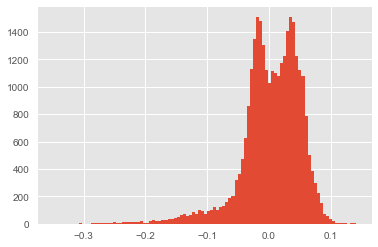

In [124]:
pd.Series(result1-result2).hist(bins=100)

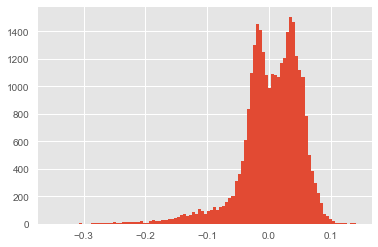

In [125]:
pd.Series((result1-result2)[X_test['error_group']==0]).hist(bins=100)

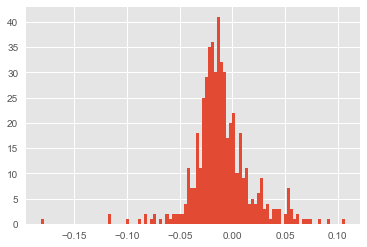

In [126]:
pd.Series((result1-result2)[X_test['error_group']!=0]).hist(bins=100)

In [128]:
result3 = result2.copy()
result3[X_test['error_group']==0] = result1[X_test['error_group']==0]

In [129]:
pd.DataFrame(result3).to_csv('test_mean.csv', index=False, header=False, sep=';')

In [185]:
import importlib
utils = importlib.reload(utils)

In [ ]:
import lightgbm as lgb
params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
#     'num_leaves': 2**3,
#     'min_child_weight': 1,
    'n_estimators': 44,
    'subsample': 0.8,
#     'reg_alpha': 1.2,
#     'reg_lambda': 0.0,
       
    'nthread': 1,
    'seed': 2707,
    'silent': True,
}

best = 1072
best_std = 1
for i in range(11111, 11311):
    std = utils.execute_model(lgb.LGBMClassifier(**params),
              X_train,
              y_train,
#               X_test,
#               model_name="model3+",
              mean_columns = [],
              use_columns = use_columns,
#               n_splits=15,
              n_folds=10,
#               stratification_groups=rew,
              alpha=20,
              seed=i,
                              verbose=0
             )
    if std<best_std:
        best_std=std
        best=i
        print(best, best_std)
    gc.collect()
        



11111 0.0024572290557
11241 0.00214028708464


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=200)
utils.execute_model(clf,
              X_train,
              y_train,
              X_test,
              model_name="model4",
              mean_columns = mean_columns,
              use_columns = use_columns,
              n_splits=15,
              n_folds=10,
#               stratification_groups=rew,
              alpha=10
             )
gc.collect()

In [ ]:
# 0.537735274001	0.537762262313 = 0.5439345
# 0.538040557134	0.538014744278 = 0.5436639
# 0.5374	0.5374                 = 0.5440495
# 0.537603843701	0.537606129043 = 0.5448082

# Со столбцами Стаса альфа=20
# 0.537387582699	0.537559051543 = 0.5482682

# 0.537684932504	0.537640948053 = 0.5514443 добавил один столбик "по Стасу"
# 0.537748490027	0.537673097079 = 0.5517563 20 фолдов для подсчета среднего

# Без них
# 0.538947547578	0.538808662263 = 0.5441786
# 0.538231869380	0.538120316604 = 0.5435621